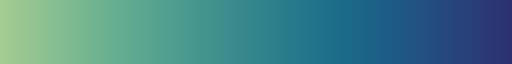

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("crest", as_cmap=True)

In [2]:
data_df = pd.read_csv('../input/walmart-dataset/Walmart.csv')
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Should we use Mean or Median to describe data
If symmetrical data -> use mean
If skewd -> use median

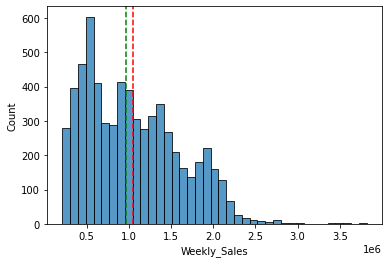

In [4]:
sns.histplot(data=data_df, x="Weekly_Sales", palette="")
plt.axvline(x=data_df["Weekly_Sales"].mean(),
            color='red', ls="--")
plt.axvline(x=data_df["Weekly_Sales"].median(),
            color='green', ls='--')
plt.show()

So here since the data is skewed, we sould use median to describe store sales overall

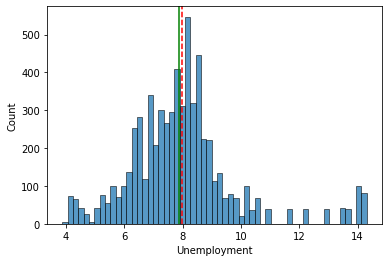

In [5]:
sns.histplot(data=data_df, x="Unemployment", palette="")
plt.axvline(x=data_df["Unemployment"].mean(),
            color='red', ls="--")
plt.axvline(x=data_df["Unemployment"].median(),
            color='green')
plt.show()

The mean and median seem fairly close, we can use either to describe `unemployment`

# Measuring dispersion
We do that by calculating variance, however when comparing variance of two or more variables that are in different units, we can use `coefficient of variation` . This is useful to answer questions like is fuel_price or CPI more variable in this sample dataset? Note this measurement makes sense if the means of the variables are quite different and the values are all positive.

In [6]:
cv_fuel = data_df['Fuel_Price'].std() / data_df['Fuel_Price'].mean()
cv_cpi = data_df['CPI'].std() / data_df['CPI'].mean()
cv_fuel, cv_cpi

(0.13666967566823784, 0.2293803515281245)

So CPI is more varies more than fuel_price